In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Дані
Ініціалізація масиву даних, зчитування датасетів, конкатинація даних в один масив

In [2]:
arr = []
for i in range(1, 32):
    day = pd.read_csv('./data/dds_ch2_nyt/nyt' + str(i) + '.csv')
    day['Day'] = i
    arr.append(day)
d = pd.concat(arr)
df = d.copy()
bins = [-1, 0, 18, 25, 35, 45, 55, 65, float('inf')]  # Age group boundaries
labels = ['N', '<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']  # Labels for age groups

# Create the 'age_group' column
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# separate signed users
df_s = df[df['Signed_In'] == 1]
df_u = df[df['Signed_In'] == 0]

df_s = df_s.drop('Signed_In', axis=1)

print(df)
print(df_s)

        Age  Gender  Impressions  Clicks  Signed_In  Day age_group
0        36       0            3       0          1    1     35-44
1        73       1            3       0          1    1       65+
2        30       0            3       0          1    1     25-34
3        49       1            3       0          1    1     45-54
4        47       1           11       0          1    1     45-54
...     ...     ...          ...     ...        ...  ...       ...
440107   41       1            4       0          1   31     35-44
440108    0       0            5       0          0   31         N
440109   22       1            3       0          1   31     18-24
440110   59       0            5       1          1   31     55-64
440111   29       1            4       0          1   31     25-34

[14905865 rows x 7 columns]
        Age  Gender  Impressions  Clicks  Day age_group
0        36       0            3       0    1     35-44
1        73       1            3       0    1       65+

C:\Users\Dima\AppData\Local\Temp\ipykernel_47148\3648654190.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_data = df.groupby('age_group').agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()
C:\Users\Dima\AppData\Local\Temp\ipykernel_47148\3648654190.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='Impressions', data=age_group_data, palette='plasma')


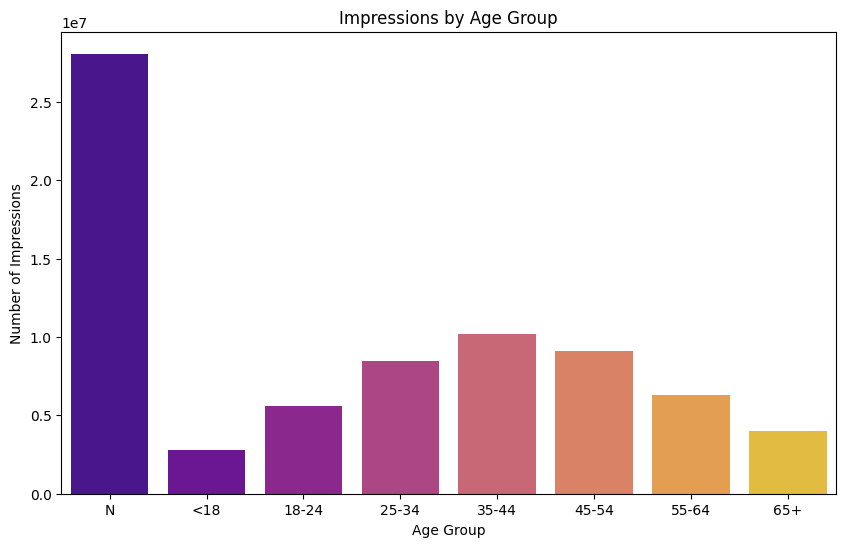

C:\Users\Dima\AppData\Local\Temp\ipykernel_47148\3648654190.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='CTR', data=age_group_data, palette='plasma')


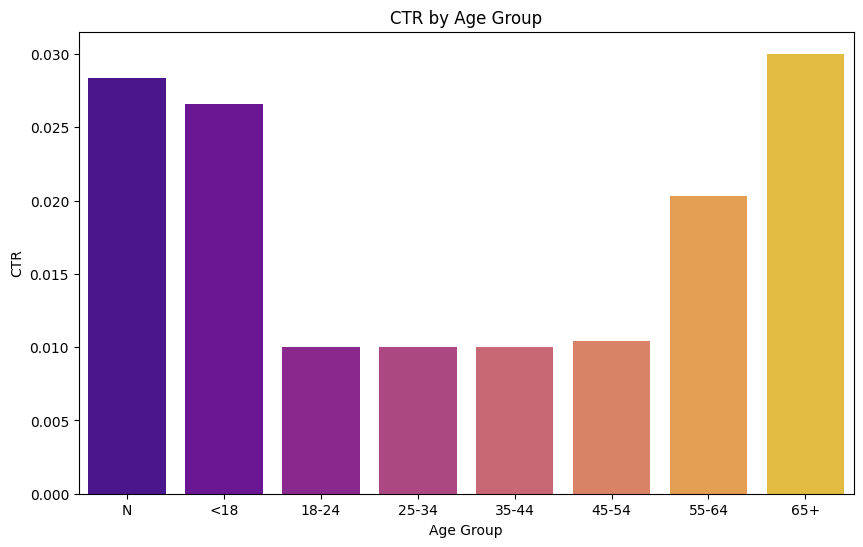

In [3]:
# Кількість показів та показник переходів для шести вікових категорій.

age_group_data = df.groupby('age_group').agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()
age_group_data['CTR'] = age_group_data['Clicks'] / age_group_data['Impressions']

plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='Impressions', data=age_group_data, palette='plasma')
plt.title('Impressions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Impressions')

plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='CTR', data=age_group_data, palette='plasma')
plt.title('CTR by Age Group')
plt.xlabel('Age Group')
plt.ylabel('CTR')

plt.show()

###
Кількість показів та показник переходів для шести вікових категорій.

З аналізу даних видно, що особливий інтерес проявляють особи у віці 35-44 років - у них найбільше показів. Ймовірно, ця аудиторія є основною цільовою групою ресурсу.

Щодо переходів на сторінки, найвищий показник спостерігається серед осіб до 18 років та після 65 років. Це може бути пов'язано з тим, що ці групи людей мають більше вільного часу для докладного огляду контенту порівняно з тими, хто зайнятий роботою.

C:\Users\Dima\AppData\Local\Temp\ipykernel_47148\3972550735.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_signed = df_s.groupby(['age_group', 'Gender']).agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()


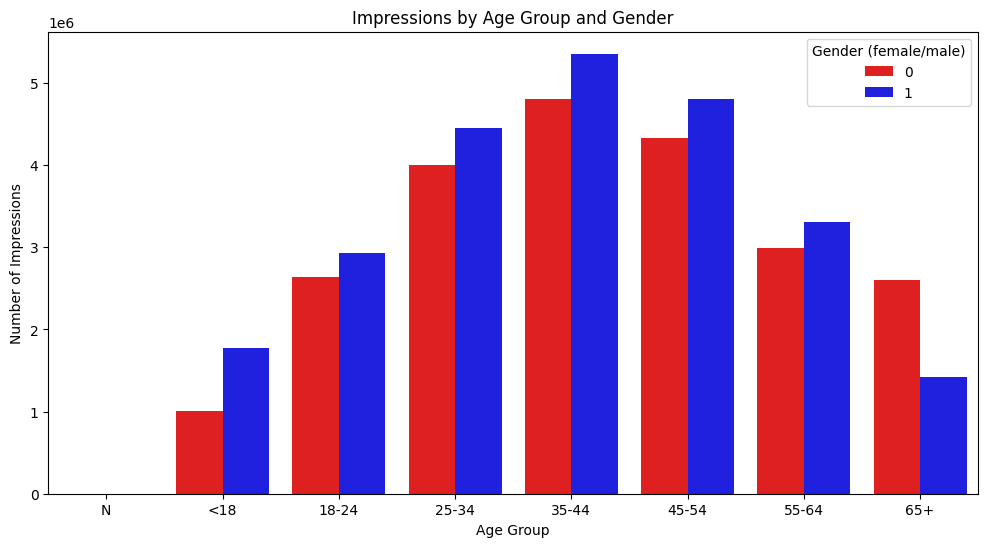

C:\Users\Dima\AppData\Local\Temp\ipykernel_47148\3972550735.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clicks_amount = df_s.groupby(['age_group', 'Gender']).agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()


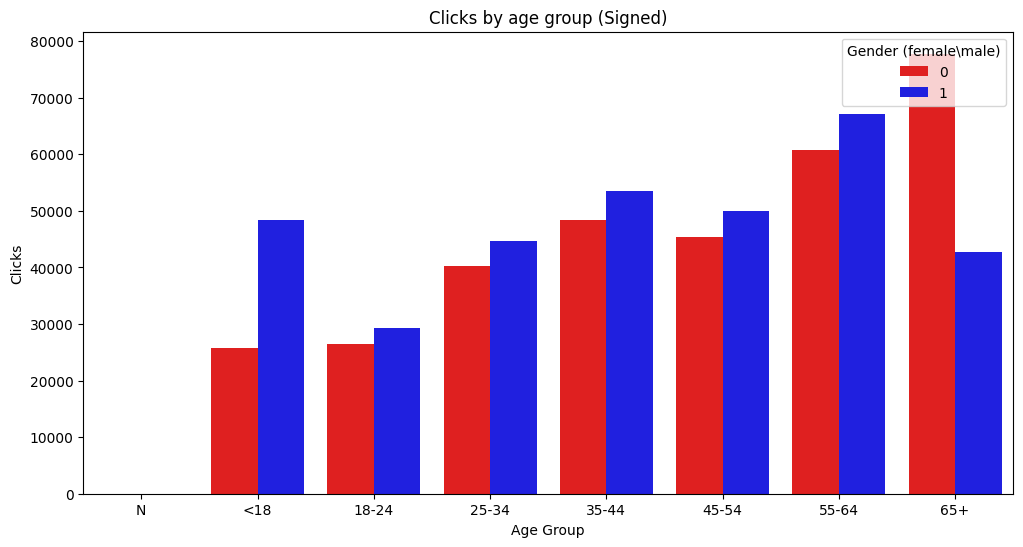

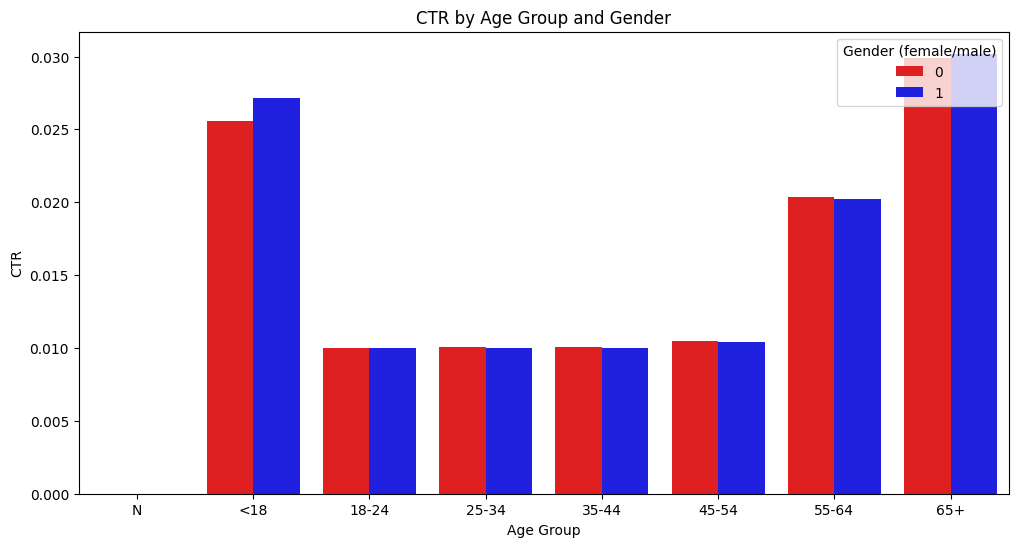

In [4]:
#Кількість показів та показник переходів людей за віком і гендером.
days_signed = df_s.groupby(['age_group', 'Gender']).agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()
days_signed['CTR'] = days_signed['Clicks'] / days_signed['Impressions']

plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='Impressions', hue='Gender', data=days_signed, palette=['red', 'blue'])
plt.title('Impressions by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Impressions')
plt.legend(title='Gender (female/male)', loc='upper right')

plt.show()

clicks_amount = df_s.groupby(['age_group', 'Gender']).agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='Clicks', hue='Gender', data=clicks_amount, palette=['red', 'blue'])
plt.title('Clicks by age group (Signed)')
plt.xlabel('Age Group')
plt.ylabel('Clicks')
plt.legend(title='Gender (female\male)', loc='upper right')

plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='CTR', hue='Gender', data=days_signed, palette=['red', 'blue'])
plt.title('CTR by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('CTR')
plt.legend(title='Gender (female/male)', loc='upper right')

plt.show()

Кількість показів та показник переходів людей за віком і гендером.

Щодо переглядів, слід зазначити, що у всіх вікових категоріях, за винятком групи 65+, переважають чоловіки. Ця тенденція взагалі відповідає статистиці тривалості життя, оскільки відомо, що чоловіки, як правило, живуть менше часу порівняно з жінками.

Також можна відзначити, що молоді чоловіки та старші люди виявляють більше активності у відношенні переходів на сторінки.

Щодо співвідношення показів до переходів, то тут різниці практично немає, можна зробити висновок що контент однаково цікавий для чоловіків та жінок

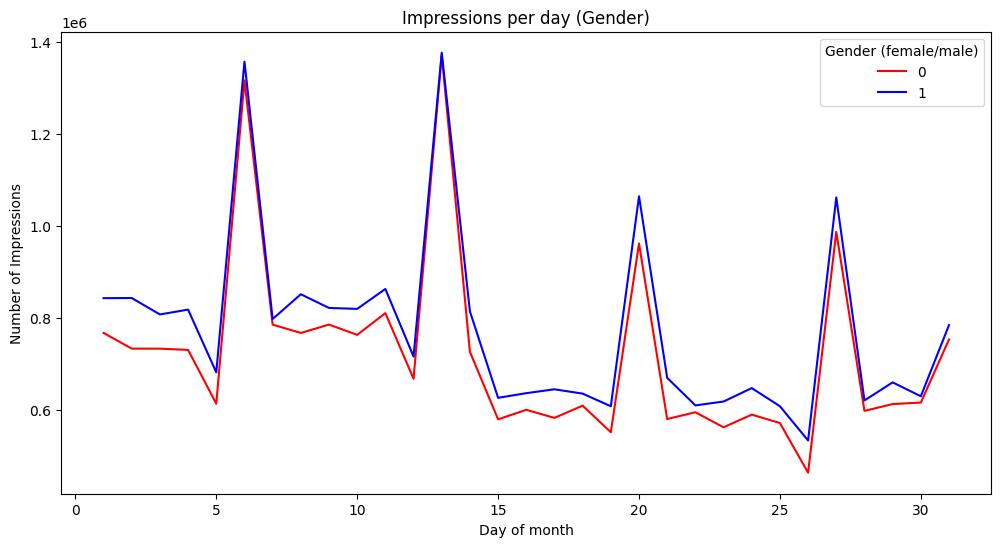

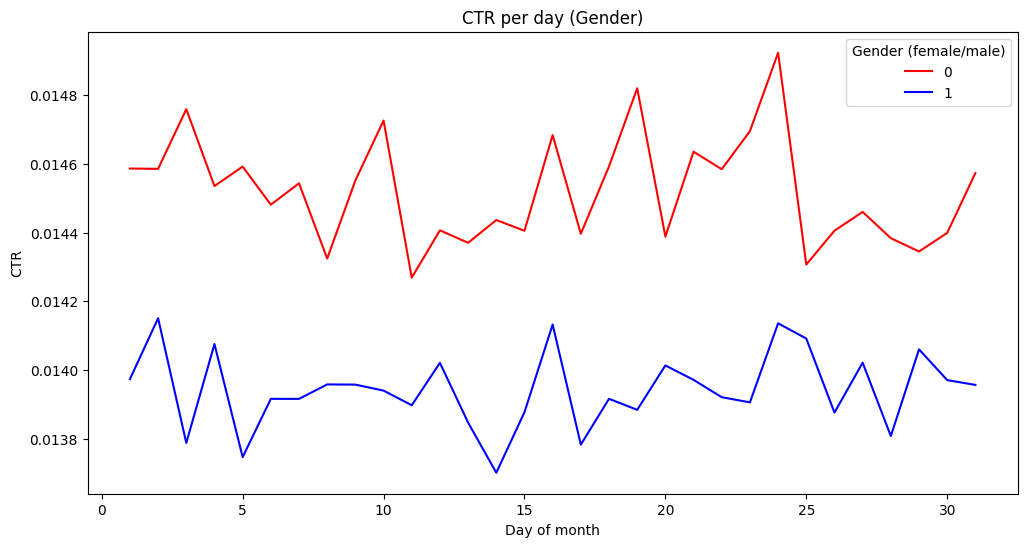

In [5]:
#Кількість показів та показник переходів впродовж дня за гендером.

days_gender = df_s.groupby(['Day', 'Gender']).agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()
days_gender['CTR'] = days_gender['Clicks'] / days_gender['Impressions']

plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='Impressions', hue='Gender', data=days_gender,palette=['red', 'blue'])
plt.title('Impressions per day (Gender)')
plt.xlabel('Day of month')
plt.ylabel('Number of Impressions')
plt.legend(title='Gender (female/male)', loc='upper right')

plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='CTR', hue='Gender', data=days_gender, palette=['red', 'blue'])
plt.title('CTR per day (Gender)')
plt.xlabel('Day of month')
plt.ylabel('CTR')
plt.legend(title='Gender (female/male)', loc='upper right')

plt.show()



###
Кількість показів та показник переходів за гендером впродовж дня.
  
З графіку можна зробити висновок, що у вихідні кількість переглядів майже однакова, різниця є, але не суттєва.

Щодо показів ресурсів, то тут жінки переважають, можна прив'язати це до того, що в жінок є більше можливостей чи часу щоб детально переглядати сторінки.

In [6]:
user_counts = df['age_group'].value_counts()
total_users = len(df)
proportions = user_counts / total_users

print('Пропорції користувачів')
print(proportions)

Пропорції користувачів
age_group
N        0.376604
35-44    0.136481
45-54    0.122673
25-34    0.113638
55-64    0.084567
18-24    0.074822
65+      0.053848
<18      0.037367
Name: count, dtype: float64


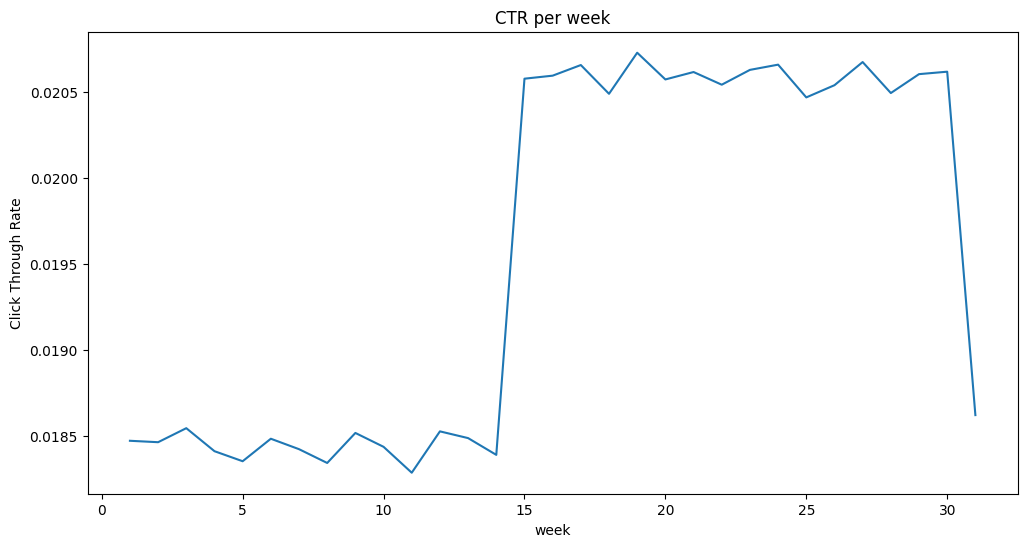

In [7]:
#Показник переходів на ресурси впродовж тижня в незалежності від віку і статі.

df['CTR'] = df['Clicks'] / df['Impressions']
grouped_data = df.groupby(['Day'])
ctr_over_time = grouped_data['CTR'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='CTR', data=ctr_over_time)
plt.title('CTR per week')
plt.xlabel('week')
plt.ylabel('Click Through Rate')

plt.show()

Показник переходів на ресурси впродовж тижня в незалежності від віку і статі.

Можна прослідкувати чітку залежність від днів тижня та кількістю переходів на сторінки, видно що ближче к уікенду ця кількість зростає.  